In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz 
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("Balanced_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2500 non-null   int64  
 1   X                      2500 non-null   int64  
 2   Artist.Reputation      2500 non-null   float64
 3   Height                 2500 non-null   int64  
 4   Width                  2500 non-null   int64  
 5   Weight                 2500 non-null   float64
 6   Material               2500 non-null   object 
 7   Price.Of.Sculpture     2500 non-null   float64
 8   Base.Shipping.Price    2500 non-null   float64
 9   International          2500 non-null   object 
 10  Express.Shipment       2500 non-null   object 
 11  Installation.Included  2500 non-null   object 
 12  Transport              2500 non-null   object 
 13  Fragile                2500 non-null   object 
 14  Customer.Information   2500 non-null   object 
 15  Remo

In [4]:
df = df.drop(['Unnamed: 0', 'X', 'Material','International','Express.Shipment','Installation.Included','Transport','Fragile','Customer.Information','Remote.Location','scheduled_year','scheduled_month','scheduled_day','scheduled_dateofmonth','delivery_year','delivery_month','delivery_day','delivery_dateofmonth','delta','state','Cost_Numeric'], axis=1)

In [5]:
df.head()

,Artist.Reputation,Height,Width,Weight,Price.Of.Sculpture,Base.Shipping.Price,Cost
0,0.07,18,13,1475.0,6.10,14.63,Very-Low
1,0.34,12,6,133.0,5.99,19.62,Very-Low
2,0.38,3,2,13.0,6.72,23.81,Very-Low
3,0.03,14,8,1108.0,5.47,12.99,Very-Low
4,0.47,13,7,664.0,4.97,13.74,Very-Low


In [6]:
y = df["Cost"]
X = df.drop(['Cost'],axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [9]:
MyDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [10]:
feature_names = X_train.columns

In [11]:
class_names = y_train.unique()

[Text(0.5, 0.875, 'Price.Of.Sculpture <= 30.61\nentropy = 2.322\nsamples = 2000\nvalue = [397, 401, 406, 391, 405]\nclass = Expensive'),
 Text(0.25, 0.625, 'Artist.Reputation <= 0.515\nentropy = 1.9\nsamples = 1265\nvalue = [114, 401, 341, 4, 405]\nclass = Low'),
 Text(0.125, 0.375, 'Base.Shipping.Price <= 26.845\nentropy = 1.655\nsamples = 824\nvalue = [35, 262, 134, 0, 393]\nclass = Low'),
 Text(0.0625, 0.125, 'entropy = 1.316\nsamples = 688\nvalue = [6, 242, 47, 0, 393]\nclass = Low'),
 Text(0.1875, 0.125, 'entropy = 1.294\nsamples = 136\nvalue = [29, 20, 87, 0, 0]\nclass = Expensive'),
 Text(0.375, 0.375, 'Base.Shipping.Price <= 26.5\nentropy = 1.685\nsamples = 441\nvalue = [79, 139, 207, 4, 12]\nclass = Expensive'),
 Text(0.3125, 0.125, 'entropy = 1.556\nsamples = 395\nvalue = [44, 139, 199, 1, 12]\nclass = Expensive'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 46\nvalue = [35, 0, 8, 3, 0]\nclass = Very-Low'),
 Text(0.75, 0.625, 'Price.Of.Sculpture <= 470.72\nentropy = 1.32

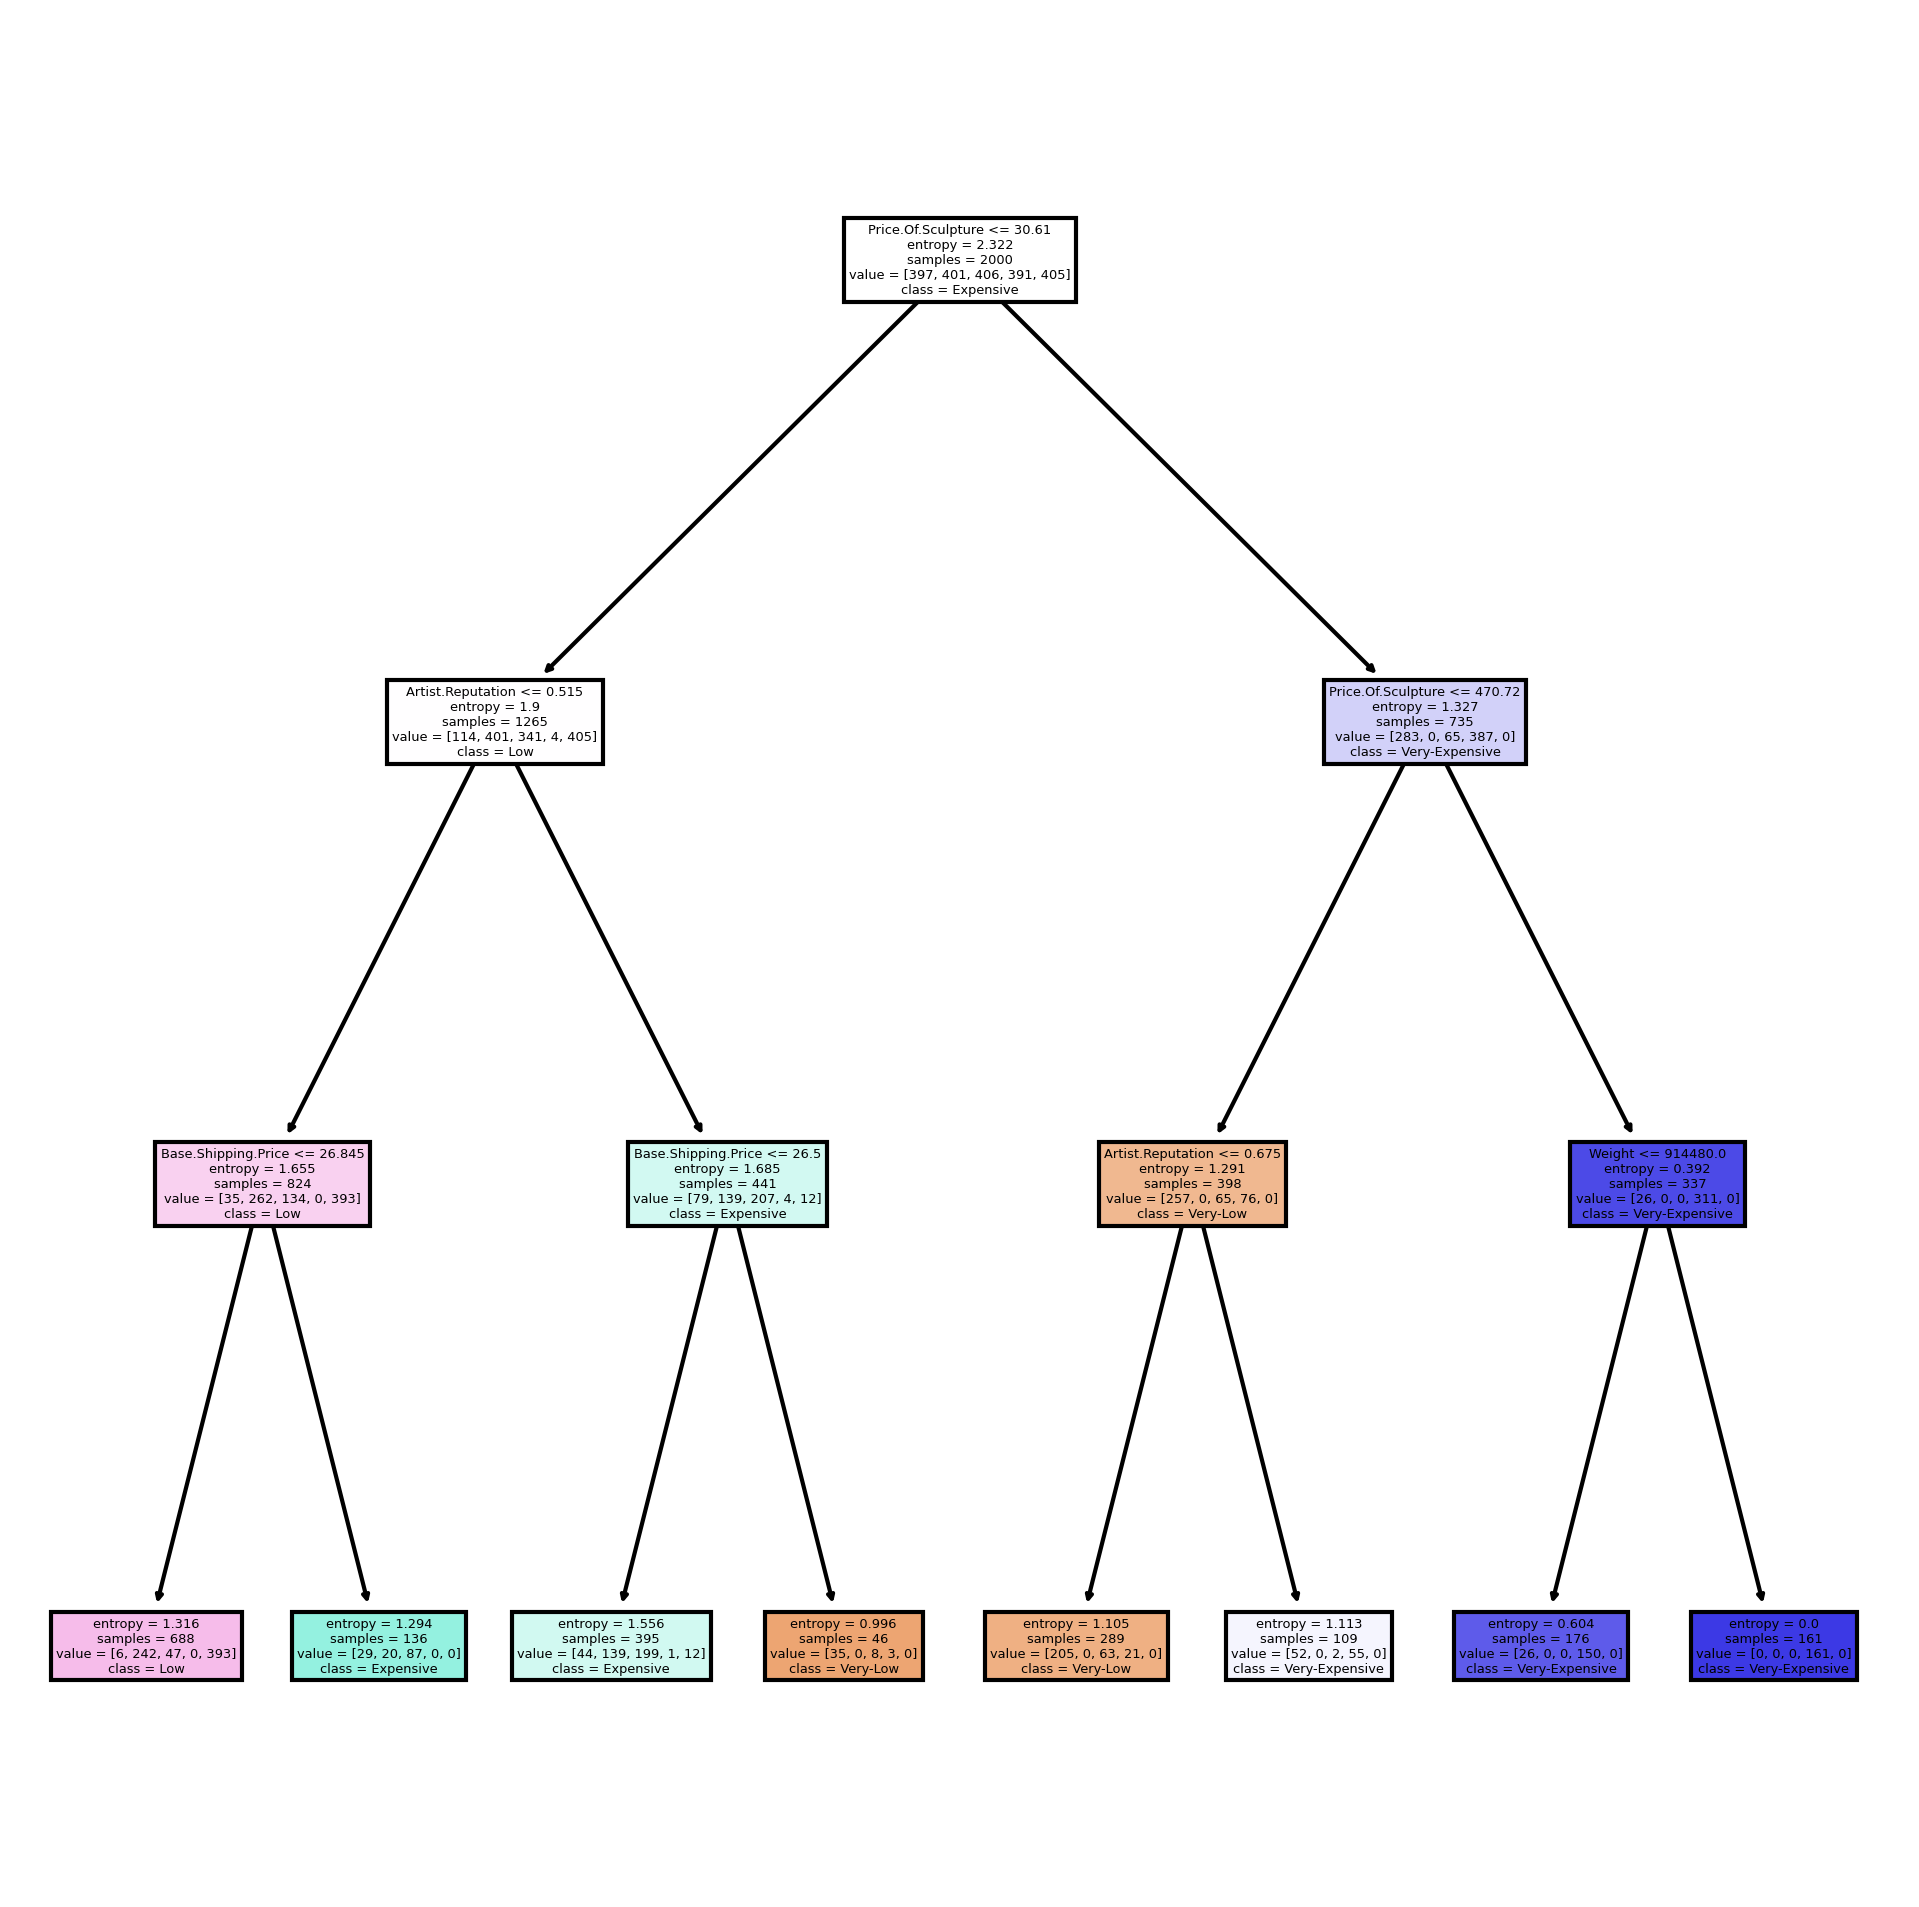

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi=300)
plot_tree(MyDT, filled=True, feature_names=feature_names, class_names=class_names, impurity=True, ax=axes)

In [13]:
# Use the classifier to make predictions on the testing data
y_pred = MyDT.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[58  0 21 23  1]
 [ 0  0 40  0 59]
 [19  0 74  0  1]
 [ 9  0  1 99  0]
 [ 0  0  2  0 93]]


Text(0.5, 1.0, 'Confusion Matrix')

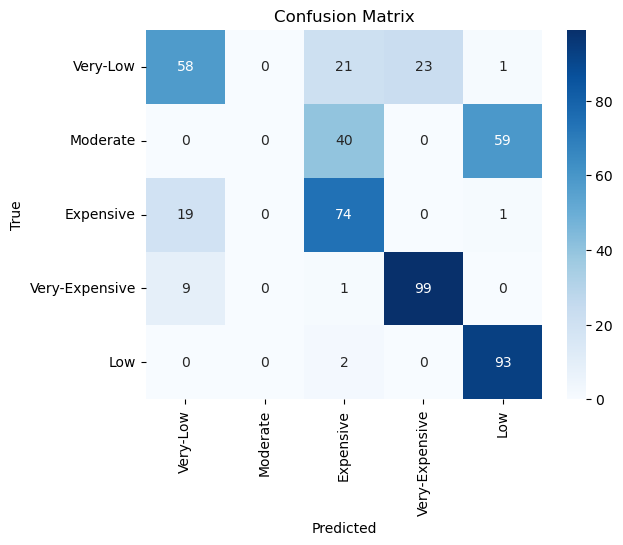

In [14]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of tree with entropy as criterion is: " + str(accuracy))

Accuracy of tree with entropy as criterion is: 0.648


In [16]:
MyDT2=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=2, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [17]:
MyDT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

[Text(0.5, 0.875, 'Price.Of.Sculpture <= 30.61\ngini = 0.8\nsamples = 2000\nvalue = [397, 401, 406, 391, 405]\nclass = Expensive'),
 Text(0.25, 0.625, 'Artist.Reputation <= 0.455\ngini = 0.716\nsamples = 1265\nvalue = [114, 401, 341, 4, 405]\nclass = Low'),
 Text(0.125, 0.375, 'Base.Shipping.Price <= 26.845\ngini = 0.631\nsamples = 755\nvalue = [29, 220, 124, 0, 382]\nclass = Low'),
 Text(0.0625, 0.125, 'gini = 0.524\nsamples = 628\nvalue = [6, 200, 40, 0, 382]\nclass = Low'),
 Text(0.1875, 0.125, 'gini = 0.505\nsamples = 127\nvalue = [23, 20, 84, 0, 0]\nclass = Expensive'),
 Text(0.375, 0.375, 'Base.Shipping.Price <= 40.13\ngini = 0.663\nsamples = 510\nvalue = [85, 181, 217, 4, 23]\nclass = Expensive'),
 Text(0.3125, 0.125, 'gini = 0.629\nsamples = 466\nvalue = [48, 181, 212, 2, 23]\nclass = Expensive'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 44\nvalue = [37, 0, 5, 2, 0]\nclass = Very-Low'),
 Text(0.75, 0.625, 'Price.Of.Sculpture <= 470.72\ngini = 0.567\nsamples = 735\nvalue = 

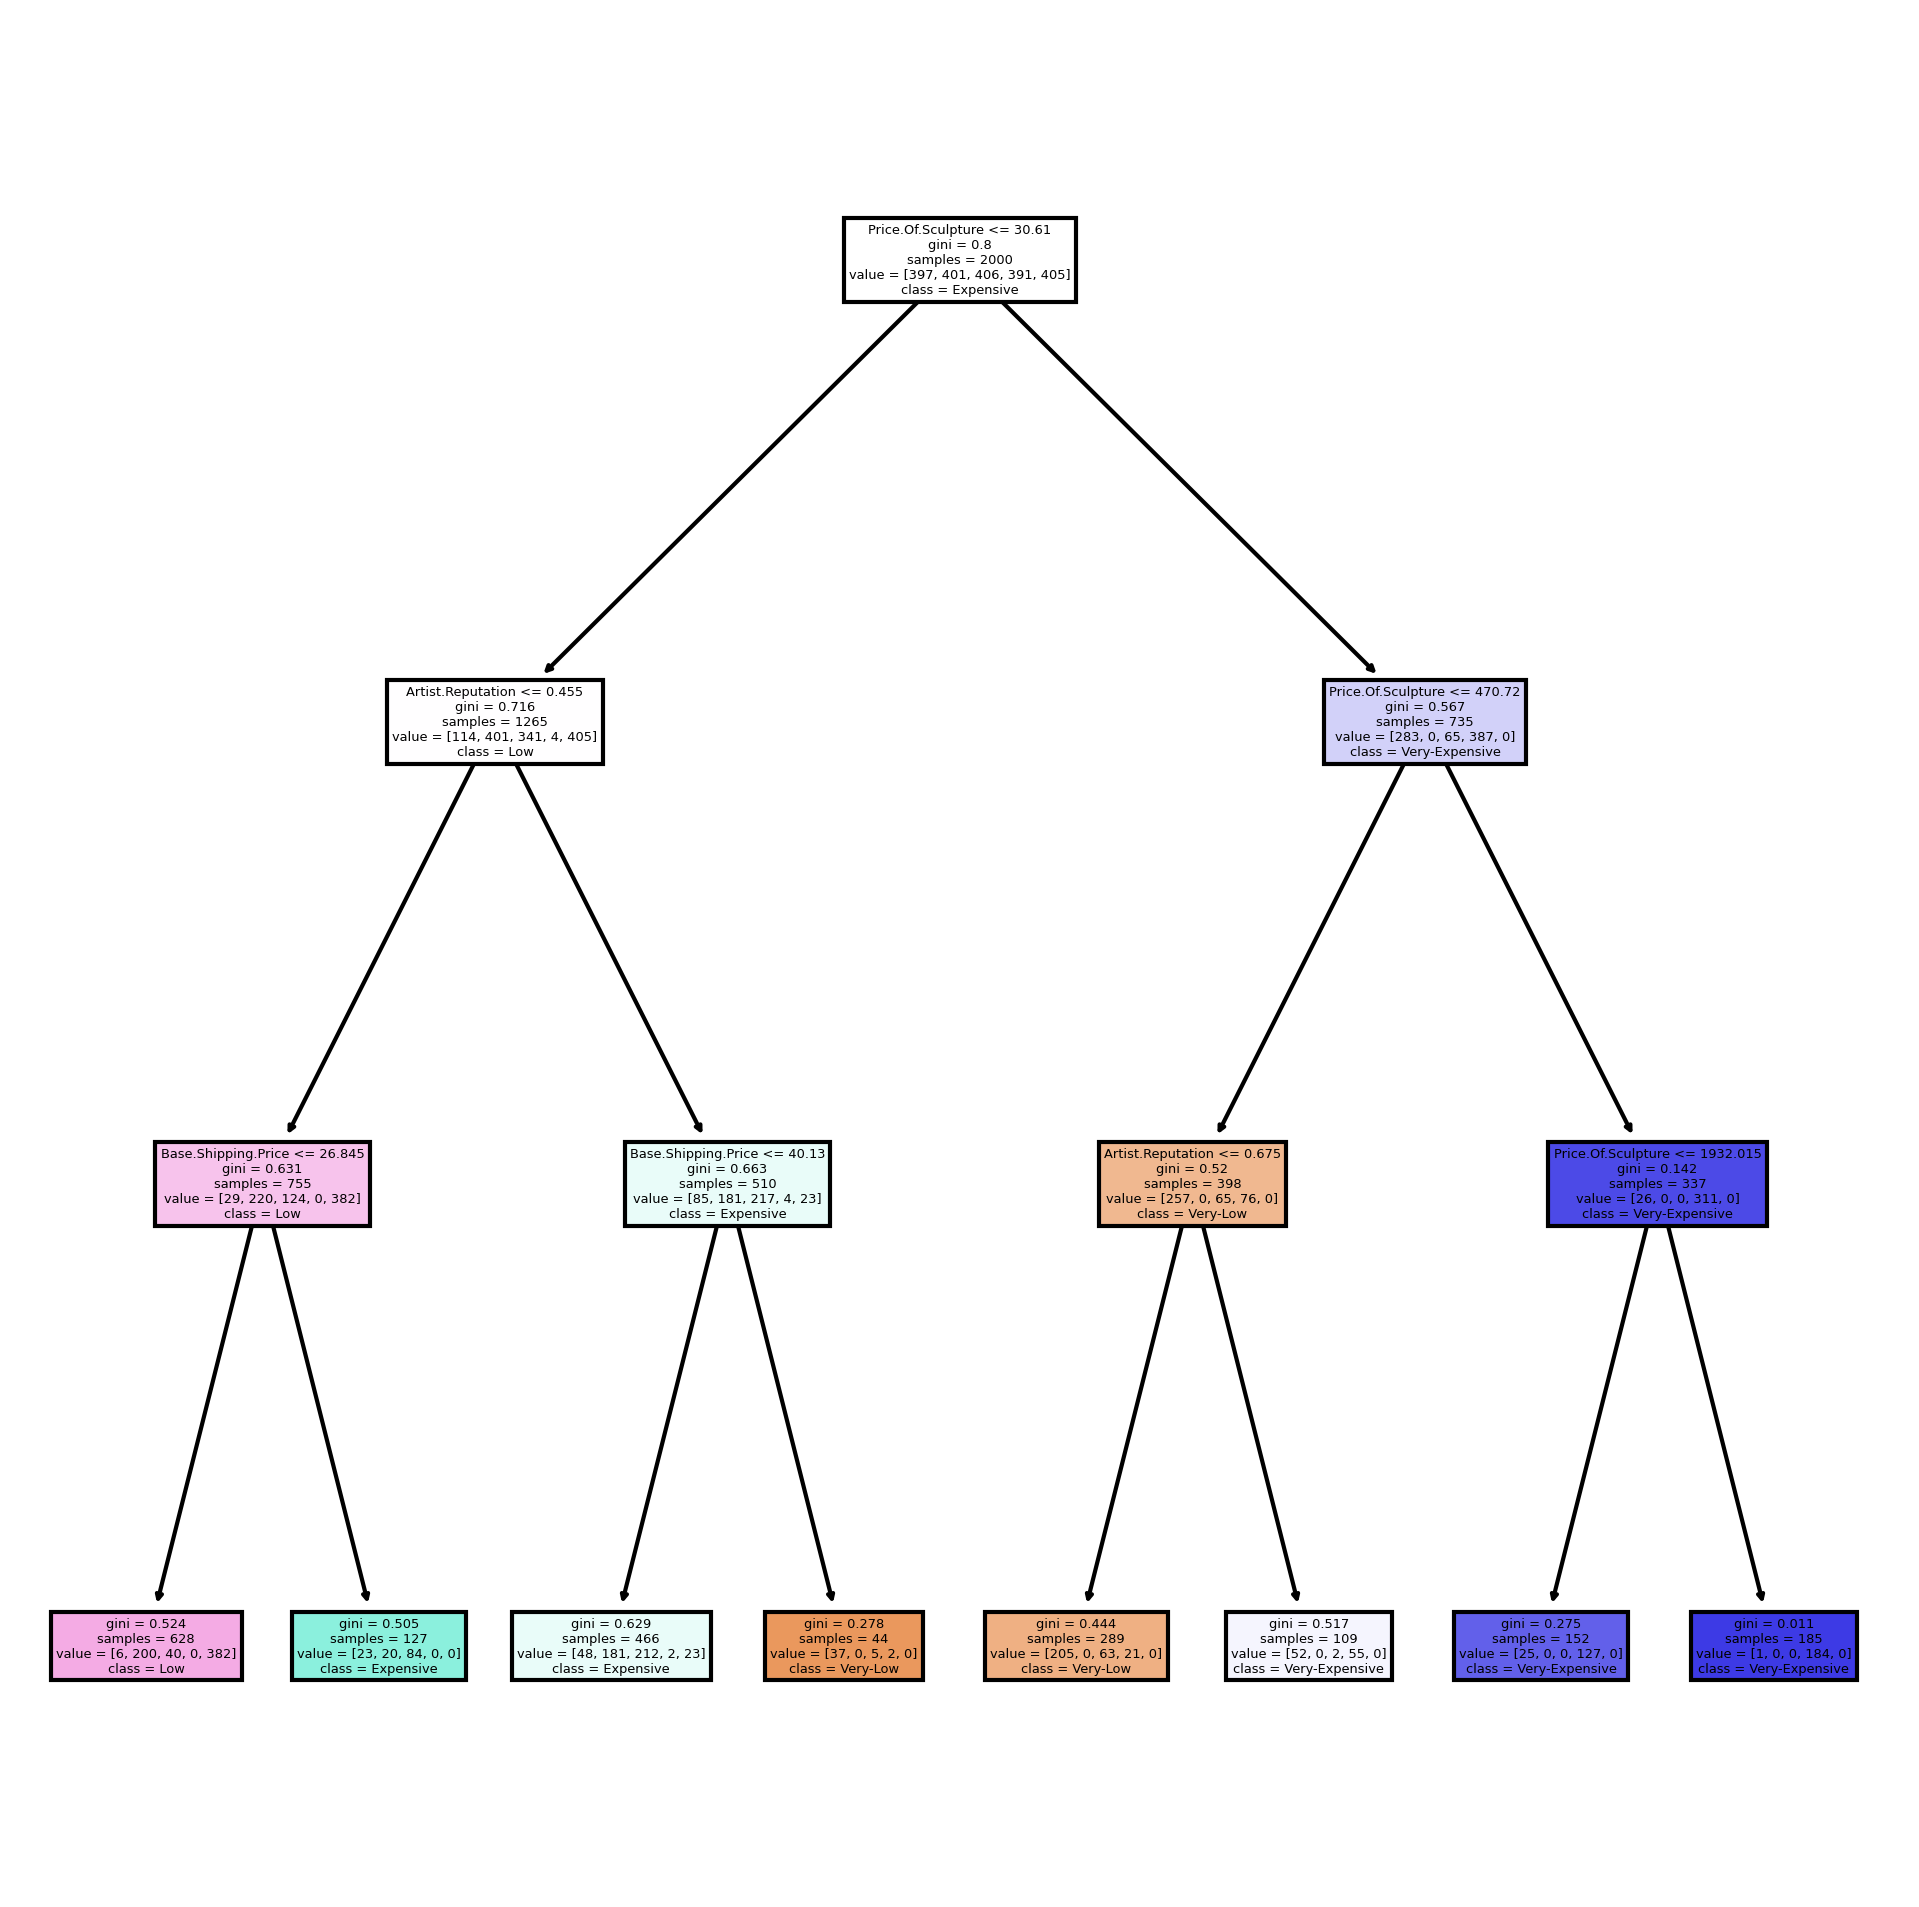

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi=300)
plot_tree(MyDT2, filled=True, feature_names=feature_names, class_names=class_names, impurity=True, ax=axes)

Accuracy of tree with gini as criterion is: 0.634


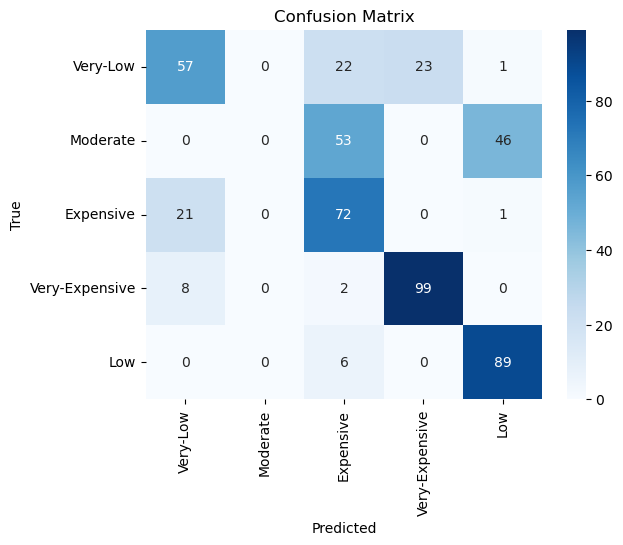

In [19]:
# Use the classifier to make predictions on the testing data
y_pred_2 = MyDT2.predict(X_test)

# Get the confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

# Print the confusion matrix

sns.heatmap(cm_2, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Get and Print the accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy of tree with gini as criterion is: " + str(accuracy_2))

In [20]:
MyDT3=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=4, 
                            min_samples_split=3, 
                            min_samples_leaf=2, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=4, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [21]:
MyDT3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_leaf=2, min_samples_split=3)

[Text(0.5, 0.9, 'Price.Of.Sculpture <= 30.61\nentropy = 2.322\nsamples = 2000\nvalue = [397, 401, 406, 391, 405]\nclass = Expensive'),
 Text(0.25, 0.7, 'Artist.Reputation <= 0.515\nentropy = 1.9\nsamples = 1265\nvalue = [114, 401, 341, 4, 405]\nclass = Low'),
 Text(0.125, 0.5, 'Price.Of.Sculpture <= 6.965\nentropy = 1.655\nsamples = 824\nvalue = [35, 262, 134, 0, 393]\nclass = Low'),
 Text(0.0625, 0.3, 'Artist.Reputation <= 0.275\nentropy = 1.276\nsamples = 617\nvalue = [8, 193, 36, 0, 380]\nclass = Low'),
 Text(0.03125, 0.1, 'entropy = 0.695\nsamples = 275\nvalue = [0, 39, 4, 0, 232]\nclass = Low'),
 Text(0.09375, 0.1, 'entropy = 1.488\nsamples = 342\nvalue = [8, 154, 32, 0, 148]\nclass = Moderate'),
 Text(0.1875, 0.3, 'Base.Shipping.Price <= 40.925\nentropy = 1.673\nsamples = 207\nvalue = [27, 69, 98, 0, 13]\nclass = Expensive'),
 Text(0.15625, 0.1, 'entropy = 1.448\nsamples = 110\nvalue = [2, 63, 32, 0, 13]\nclass = Moderate'),
 Text(0.21875, 0.1, 'entropy = 1.13\nsamples = 97\nvalu

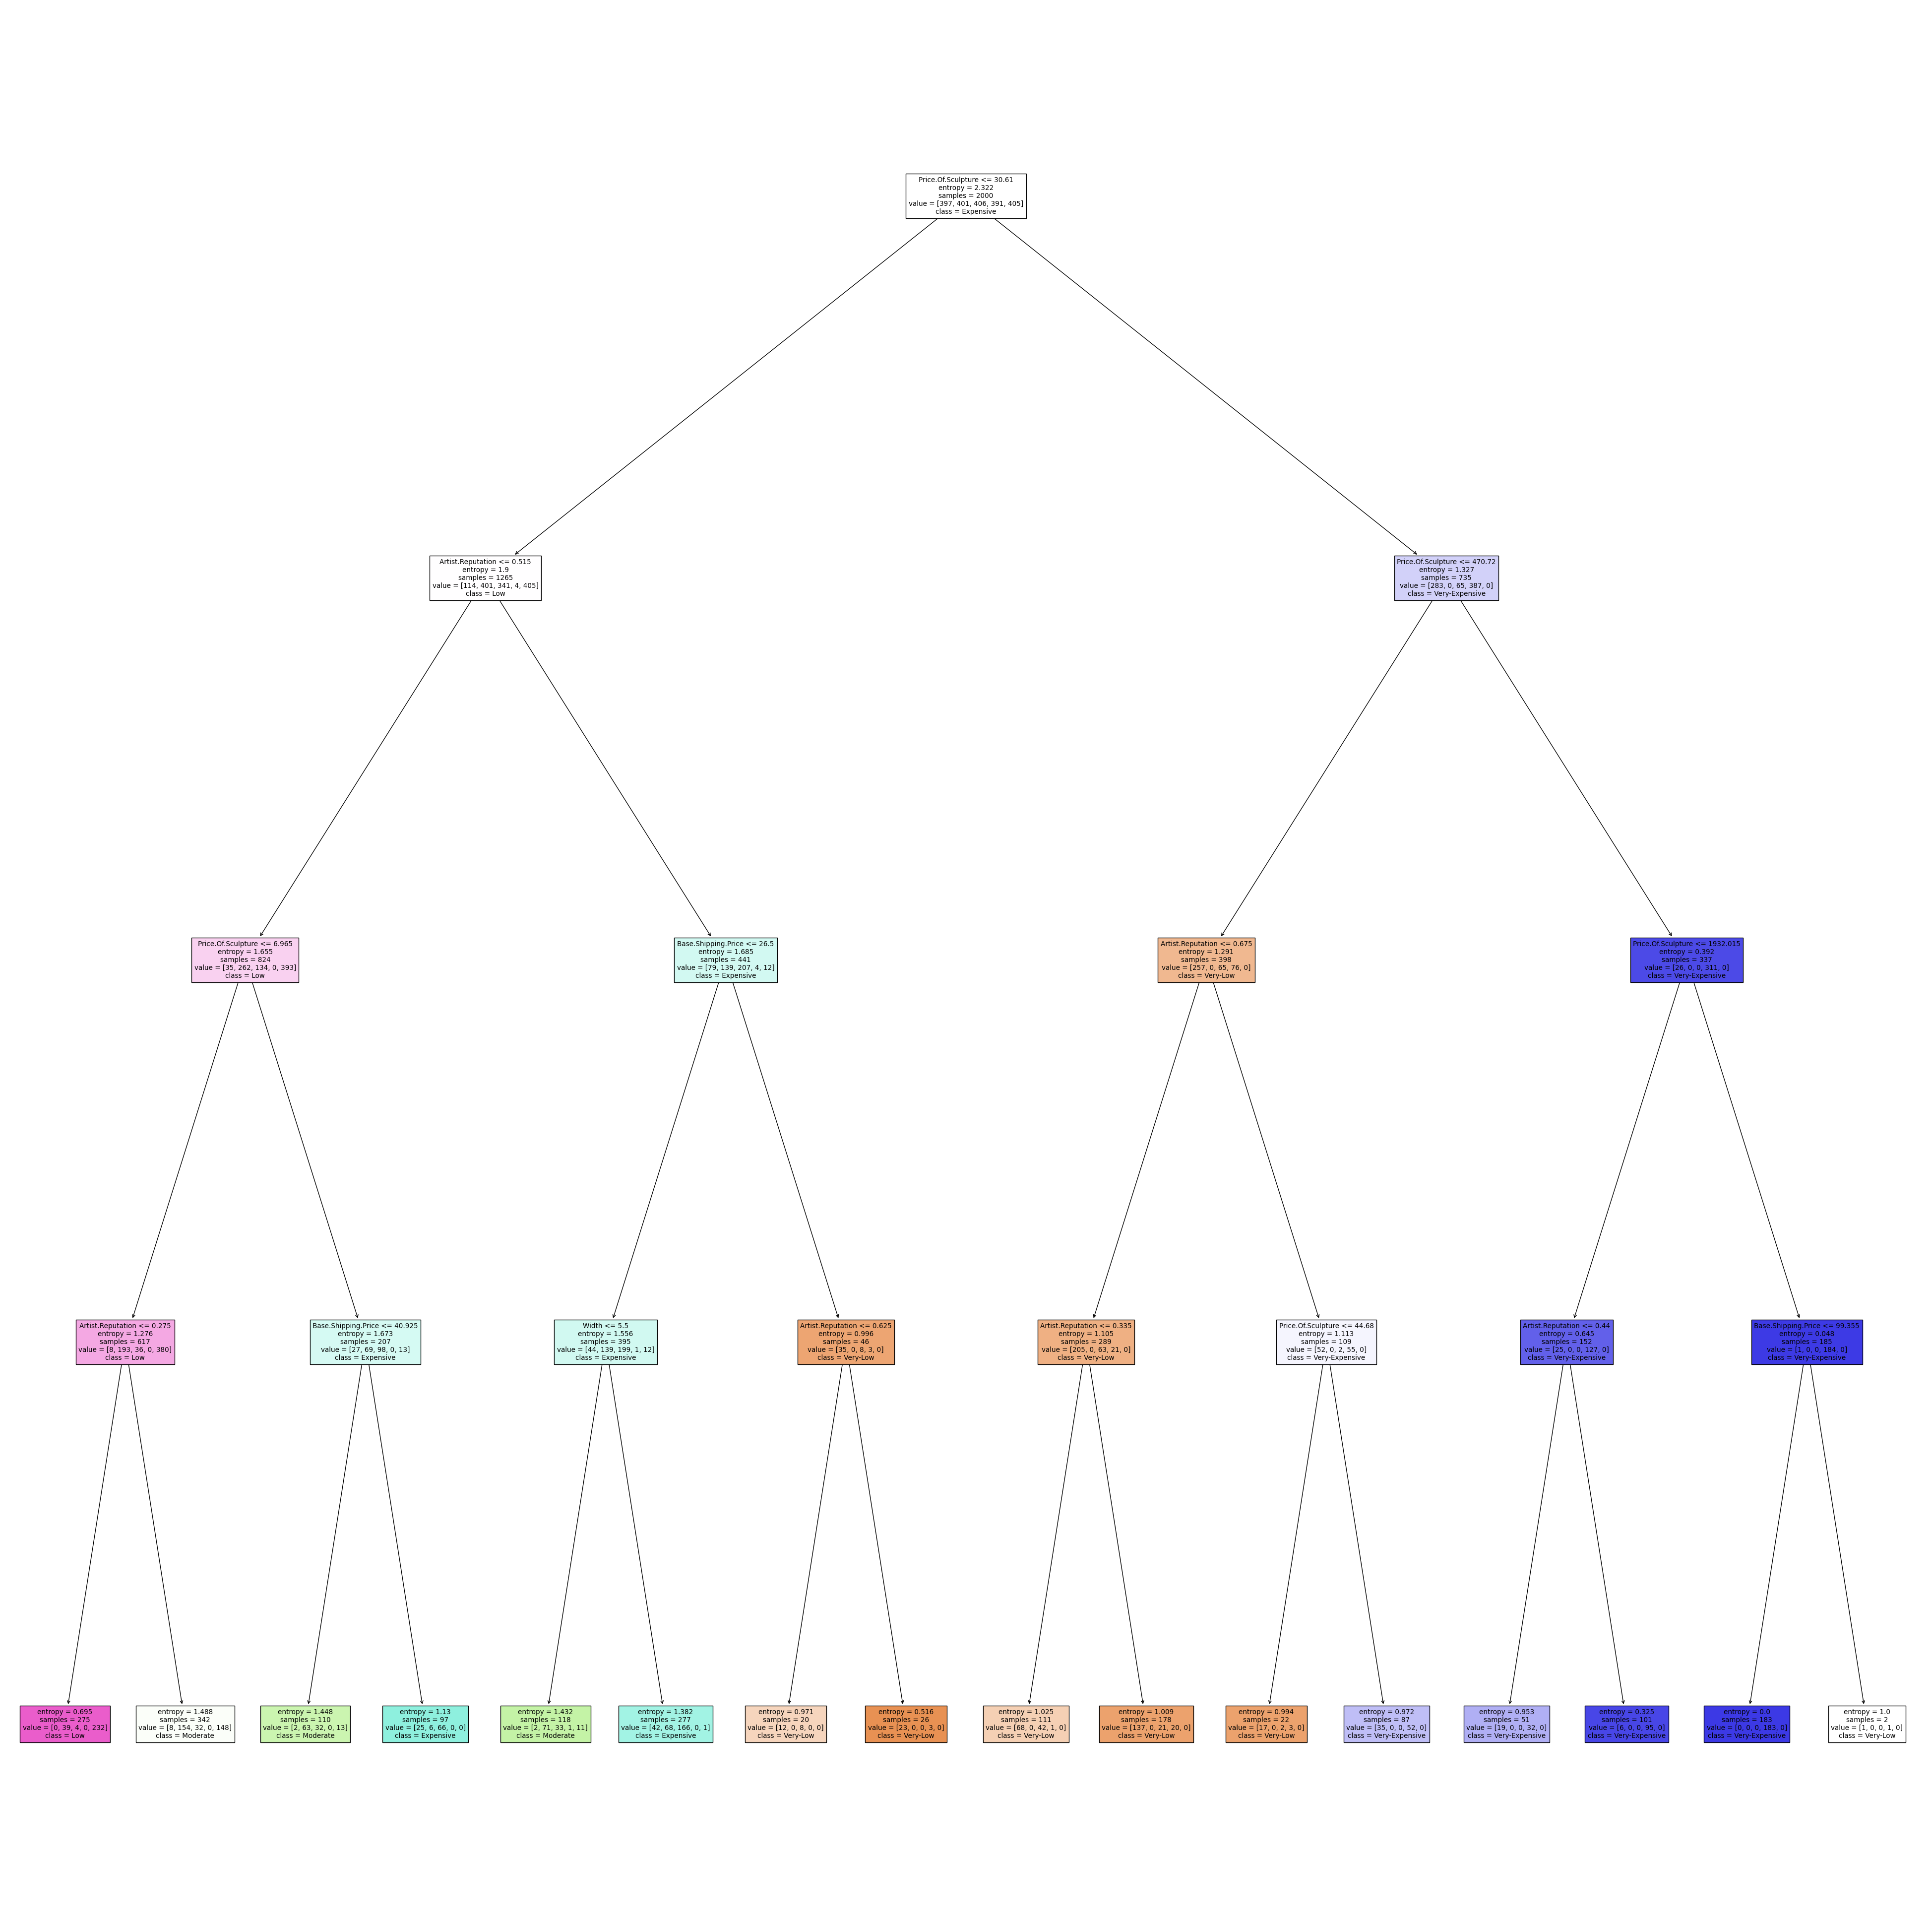

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50, 50), dpi=100)
plot_tree(MyDT3, filled=True, feature_names=feature_names, class_names=class_names, impurity=True, ax=axes)

Accuracy of tree with entropy as criterion, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=3 is: 0.676


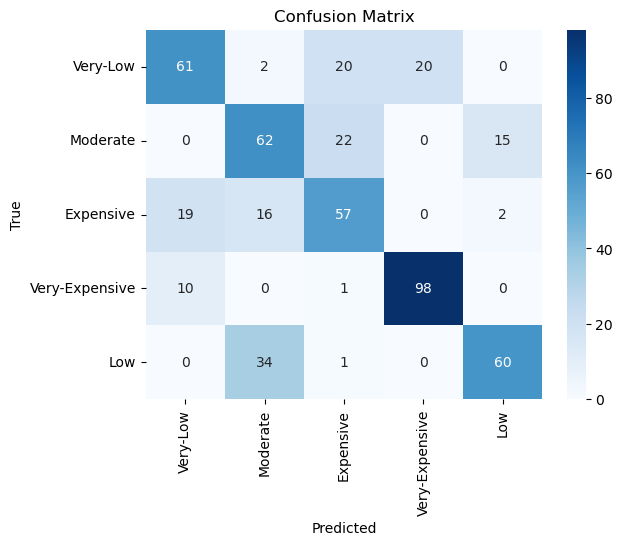

In [23]:
# Use the classifier to make predictions on the testing data
y_pred_3 = MyDT3.predict(X_test)

# Get the confusion matrix
cm_3 = confusion_matrix(y_test, y_pred_3)

# Print the confusion matrix
sns.heatmap(cm_3, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Get and Print the accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Accuracy of tree with entropy as criterion, max_depth=4, max_features=4, min_samples_leaf=2, min_samples_split=3 is: " + str(accuracy_3))

In [24]:
# get the feature importances
importances = MyDT3.feature_importances_

# print the feature importances
for feature, importance in zip(feature_names, importances):
    print(feature, importance)

Artist.Reputation 0.19687240546933552
Height 0.0
Width 0.024119327500116472
Weight 0.0
Price.Of.Sculpture 0.715023703934256
Base.Shipping.Price 0.06398456309629222


### Multinomial Naive Bayes

In [25]:
multinomial_nb = MultinomialNB()

In [26]:
# Fit the classifier to the training data
multinomial_nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Use the classifier to make predictions on the testing data
y_pred_multinomial_nb = multinomial_nb.predict(X_test)

In [28]:
# Get the accuracy score and confusion matrix
accuracy_multinomial_nb = accuracy_score(y_test, y_pred_multinomial_nb)
cm_multinomial_nb = confusion_matrix(y_test, y_pred_multinomial_nb)

In [29]:
# Print the accuracy and confusion matrix
print("Accuracy:", accuracy_multinomial_nb)
print("Confusion Matrix:\n", cm_multinomial_nb)

Accuracy: 0.448
Confusion Matrix:
 [[42 23 20  3 15]
 [ 1 19 10  0 69]
 [14 32 13  0 35]
 [24  8  1 70  6]
 [ 0 12  3  0 80]]


### Bernoulli Naive Bayes

In [30]:
bernoulli_nb = BernoulliNB()

In [31]:
# Fit the classifier to the training data
bernoulli_nb.fit(X_train, y_train)

BernoulliNB()

In [32]:
# Use the classifier to make predictions on the testing data
y_pred_bernoulli_nb = bernoulli_nb.predict(X_test)

In [33]:
# Get the accuracy score and confusion matrix
accuracy_bernoulli_nb = accuracy_score(y_test, y_pred_bernoulli_nb)
cm_bernoulli_nb = confusion_matrix(y_test, y_pred_bernoulli_nb)

In [34]:
# Print the accuracy and confusion matrix
print("Accuracy:", accuracy_bernoulli_nb)
print("Confusion Matrix:\n", cm_bernoulli_nb)

Accuracy: 0.188
Confusion Matrix:
 [[  0   0 103   0   0]
 [  0   0  99   0   0]
 [  0   0  94   0   0]
 [  0   0 109   0   0]
 [  0   0  93   2   0]]
